## 参考

* 式展開
    * https://www.slideshare.net/KenjiUrai/explanation-of-gpr
* ハイパーパラメータ
    * https://qiita.com/ctgk/items/4c4607edf15072cddc46

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inv = lambda X: np.linalg.inv(X)

norm = lambda x: np.linalg.norm(x)

def kernel(x, y, a=1, b=1):
    return a*np.exp(-b*0.5*norm(x-y)**2)

def K(X, a=1, b=1):
    N = X.shape[1]
    KM = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            KM[i,j] = kernel(X[:,i],X[:,j],a, b) 
    return KM

def k(X_h, X, a=1, b=1):
    N_h, N = X_h.shape[1], X.shape[1]
    kM = np.zeros((N,N_h))
    for i in range(N):
        for j in range(N_h):
            kM[i,j] = kernel(X_h[:,j], X[:,i],a, b) 
    return kM

def k_(X, a=1, b=1):
    N = X.shape[1]
    kv = np.zeros((N,1))
    for i in range(N):
        kv[i,0] = kernel(X[:,i], X[:,i], a, b)
    return kv

def grad(X, a=1, b=1):
    N = X.shape[1]
    GA, GB = np.zeros((N,N)), np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            diff = norm(X[:,i]-X[:,j])**2
            GA[i,j] = np.exp(-0.5*b*diff)
            GB[i,j] = -0.5*a*b*diff*GA[i,j]
    return GA, GB

update = lambda y, C, G: -0.5*np.trace(C.dot(G))+0.5*y.T.dot(C.dot(G.dot(C.dot(y))))

"""
sg = 1 # yの分散(適当)
a, b = 1, 1 # カーネルのパラメータ(適当)
lr = 0.1 # 学習率(適当)
"""
def train(X, Xh, y, sg=0.1, a=1, b=1, lr=0.1, epoch=50):
    for i in range(epoch):
        # カーネル計算
        Cm = inv(K(X, a, b)+sg*np.eye(X.shape[1],X.shape[1]))
        kv = k(Xh, X, a, b)
        kh = k_(Xh, a, b)
    
        # ハイパーパラメータの更新
        GA, GB = grad(X, a, b)
        a += lr*update(y, Cm, GA)
        b += lr*update(y, Cm, GB)
        print(a, b)
    
    # 平均値と分散
    yh_mean = kv.T.dot(Cm).dot(y)
    yh_std = np.sqrt(kh - np.diag(kv.T.dot(Cm).dot(kv)).reshape(-1,1))
    
    return yh_mean, yh_std

In [3]:
num = 100
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)])
target = np.sin(data[0,:])+np.cos(data[1,:])+np.random.rand(data.shape[1])

# 学習用データ
sample_num = 25
sample = random.sample(range(data.shape[1]),k=data.shape[1])
X = data[0:2, sample[:sample_num]]
y = target[sample[:sample_num]].reshape(-1,1)

# 予測用データ
Xh = data

[[ 0.96562122]] [[ 0.90286454]]
[[ 0.94054861]] [[ 0.81257937]]
[[ 0.92411342]] [[ 0.72982676]]
[[ 0.91535801]] [[ 0.65525753]]
[[ 0.91317545]] [[ 0.58938037]]
[[ 0.91642535]] [[ 0.53245138]]
[[ 0.92400153]] [[ 0.48439688]]
[[ 0.93486055]] [[ 0.44479566]]
[[ 0.94803443]] [[ 0.41292122]]
[[ 0.96264599]] [[ 0.38782425]]
[[ 0.97793173]] [[ 0.36843305]]
[[ 0.99326617]] [[ 0.35365691]]
[[ 1.00817669]] [[ 0.34247797]]
[[ 1.02234165]] [[ 0.33401647]]
[[ 1.03557185]] [[ 0.32756062]]
[[ 1.04778192]] [[ 0.32256476]]
[[ 1.05895992]] [[ 0.31862727]]
[[ 1.06914065]] [[ 0.31546068]]
[[ 1.07838529]] [[ 0.31286256]]
[[ 1.08676734]] [[ 0.31069119]]
[[ 1.09436362]] [[ 0.30884709]]
[[ 1.10124904]] [[ 0.30725969]]
[[ 1.10749383]] [[ 0.30587813]]
[[ 1.11316231]] [[ 0.30466501]]
[[ 1.11831257]] [[ 0.30359219]]
[[ 1.12299666]] [[ 0.302638]]
[[ 1.12726102]] [[ 0.30178538]]
[[ 1.13114699]] [[ 0.30102062]]
[[ 1.13469137]] [[ 0.30033252]]
[[ 1.13792696]] [[ 0.29971174]]
[[ 1.14088301]] [[ 0.29915043]]
[[ 1.14358

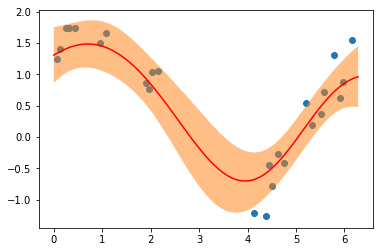

In [10]:
# 学習(パラメータは適当)
yh_mean, yh_std = train(X, Xh, y)

# plot
plt.plot(Xh[0,:],yh_mean,c="red")
plt.scatter(X[0,:], y)
plt.fill_between(Xh[0,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)

In [12]:
from sklearn.datasets import load_boston

data = load_boston().data.T
y = load_boston().target

np.corrcoef(data,y)[-1]


array([-0.38583169,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])

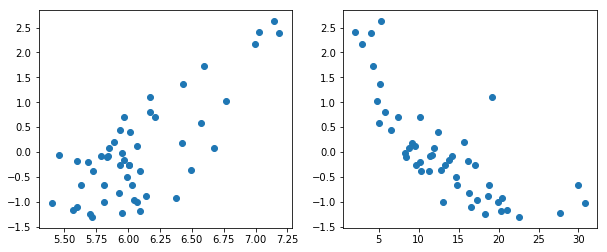

In [44]:

length= 50
X = np.array([data[5,:length],data[12,:length]])
y = load_boston().target[:length].reshape(-1,1)
y = (y-y.mean())/y.std() # 平均をゼロに?
num = 50
Xh = np.array([np.linspace(X[0].min(),X[0].max(),num),np.linspace(X[1].min(),X[1].max(),num)])

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[0], y)
plt.subplot(122)
plt.scatter(X[1], y)

#np.linspace(X[0].min(),X[0].max(),num)

In [45]:
# 学習(パラメータは適当)
yh_mean, yh_std = train(X, Xh, y, epoch=10)

[[ 1.01374037]] [[ 1.07679251]]
[[ 1.03429803]] [[ 1.26565549]]
[[ 1.07366992]] [[ 1.61743532]]
[[ 1.08185459]] [[ 1.88855544]]
[[ 1.0520081]] [[ 1.98176844]]
[[ 1.04077154]] [[ 2.02625162]]
[[ 1.03637105]] [[ 2.0486451]]
[[ 1.03421205]] [[ 2.06007912]]
[[ 1.03313962]] [[ 2.06601814]]
[[ 1.03258596]] [[ 2.06912345]]


(50,) (50, 1)


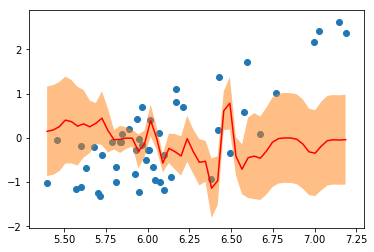

In [47]:
print(Xh[0,:].shape,y.shape)

# plot
idx = 0
plt.plot(Xh[idx,:],yh_mean,c="red")
plt.scatter(X[idx,:], y)
plt.fill_between(Xh[idx,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)

In [49]:
X[:,1]


array([ 6.421,  9.14 ])